In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
data = pd.read_csv('../data/titanic-train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Primero vemos quienes tienen nulls para rellenarlos o eliminarlos

In [4]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Here I fill Age with median because it's not prone to outliers, and I fill Embarked with 'S' because S means South Hampton (the place where many people boarded on the titanic)

In [5]:
data['Age'] = data['Age'].fillna(data.Age.median())

In [6]:
data['Embarked'] = data.Embarked.fillna('S')

In [7]:
y_target = data['Survived'].values # What we want to predict
data = data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [8]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [9]:
data = pd.get_dummies(data)
data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


Split data into train and test

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data, y_target, test_size=0.25, random_state = 1)

In [11]:
x_train = x_train.copy()
x_test = x_test.copy()

In [12]:
x_train = x_train.values
x_test = x_test.values

In [13]:
model = tree.DecisionTreeClassifier().fit(x_train, y_train)

In [14]:
model_accuracy = round(model.score(x_test, y_test), 4)
print('Mean accuracy: %0.4f' % (model_accuracy))

Mean accuracy: 0.7623


In [15]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]
model_roc_auc_score = roc_auc_score(y_test, y_prob)
print('ROC AUC score: %0.4f' % (model_roc_auc_score))

ROC AUC score: 0.7417


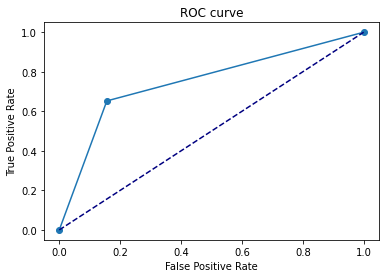

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.scatter(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve')
plt.show()

In [17]:
from io import StringIO
from IPython.display import Image, display
import pydotplus

out = StringIO()
tree.export_graphviz(model, out_file = out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanic.png')

True